## Homework: 02
The main task here is to develop a regression model to predict certain target variables using machine learning techniques. This involves exploring the dataset, preparing the data, selecting appropriate features, training the model, and evaluating its performance. The focus is on using regression analysis to understand and predict continuous outcomes.

> Note: sometimes your answer doesn't match one of  
> the options exactly. That's fine.  
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```

The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

In [1]:
import os # (Use Python’s "os.makedirs" function to create the directory since it doesn't exist yet.)
import requests #(Use Python's requests library as an Alternative to download the file because this environment doesn't support "wget")

# URL of the file to be downloaded
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

# Path where the file will be saved
file_path = '/home/awsl/ML_Zoomcamp_2024_Modules/data/laptops.csv'

# Ensure the directory exists, create it if necessary
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Download the file using requests
response = requests.get(url)

# Write the content to a file
with open(file_path, 'wb') as f:
    f.write(response.content)

print(f"File downloaded successfully at {file_path}")


File downloaded successfully at /home/awsl/ML_Zoomcamp_2024_Modules/data/laptops.csv


### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [2]:
# Import required modules.
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Define the link to the data.
df_link = '/home/awsl/ML_Zoomcamp_2024_Modules/data/laptops.csv'

In [5]:
data_need = pd.read_csv(df_link)

In [6]:
# Prepare the dataset.
data_need.columns = data_need.columns.str.lower().str.replace(' ', '_')

In [7]:
# Subset the dataset.
columns_need = ['ram', 'storage', 'screen', 'final_price']

data = data_need[columns_need]

### EDA

* Look at the `final_price` variable. Does it have a long tail? 

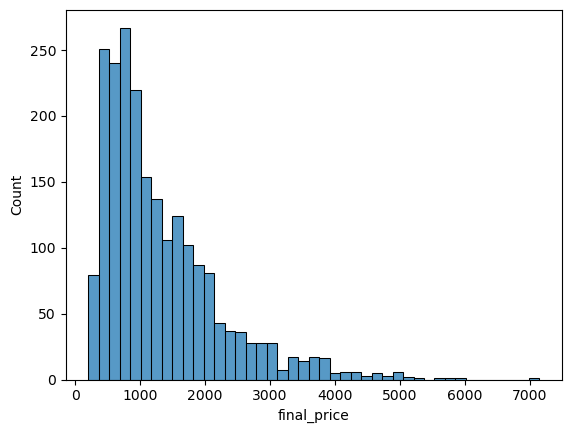

In [8]:
# Plot a histogram of the final_price.
sns.histplot(data['final_price']);

Yes the `final_price` has a long tail.

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [9]:
# Check for missing values in data
data.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Question 1 Answer= 'screen'

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [10]:
# Find the median for variable 'ram'.
data['ram'].median()

16.0

Question 2 Answer= 16

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [13]:
# Find the lengths of n_val, n_test, n_train.
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
# Shuffle the indices.
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [16]:
# Derive data_train, data_val and data_test.
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]

In [17]:
# Show the lengths of data_train, data_val and data_test.
len(data_train), len(data_val), len(data_test)

(1296, 432, 432)

In [18]:
# Drop the indices.
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [19]:
# Derive y_train, y_val and y_test.
y_train = data_train.final_price
y_val = data_val.final_price
y_test = data_test.final_price

In [20]:
# Delete final_price from data_train, data_val and data_test.
del data_train['final_price']
del data_val['final_price']
del data_test['final_price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [21]:
# Define train_linear function.
def train_linear(X, y):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [22]:
# Define fill_with_zero function.
def fill_with_zero(data):
    data = data.fillna(0)
    X = data.values
    return X

In [28]:
# Define fill_with_mean function (Using only training data).
mean_values = data_train.mean()
mean_screen = mean_values['screen']

def fill_with_mean(data):
    data = data.fillna(mean_screen)
    X = data.values
    return X

In [29]:
# Defime the rmse_value function.
def rmse_value(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    rmse_error = np.sqrt(mse)
    return rmse_error

In [30]:
# Find the RMSE for fill_with_zero.
X_train = fill_with_zero(data_train)
w0, w = train_linear(X_train, y_train)
X_val = fill_with_zero(data_val)
y_pred = w0 + X_val.dot(w)
rmse_val = round(rmse_value(y_val, y_pred), 5)
rmse_val

597.36356

In [31]:
# Find the RMSE for fill_with_mean.
X_train = fill_with_mean(data_train)
w0, w = train_linear(X_train, y_train)
X_val = fill_with_mean(data_val)
y_pred = w0 + X_val.dot(w)
rmse_val = round(rmse_value(y_val, y_pred), 5)
rmse_val

600.26503

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [32]:
# Define train_regularized function.
def train_regularized(X, y, r):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
#  Train a regularized linear regression with different r.
for i in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    X_train = fill_with_zero(data_train)
    w0, w = train_regularized(X_train, y_train, r=i)
    
    X_val = fill_with_zero(data_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse_value(y_val, y_pred)
    
    print(f"regularization:{i}, bias:{w0}, RMSE:{score:.2f}")

regularization:0, bias:676.8954853003471, RMSE:597.36
regularization:0.01, bias:676.2736817204672, RMSE:597.36
regularization:0.1, bias:670.7284836313021, RMSE:597.35
regularization:1, bias:619.9030834107807, RMSE:597.21
regularization:5, bias:463.77716971415225, RMSE:597.01
regularization:10, bias:352.79713367676436, RMSE:597.06
regularization:100, bias:66.92071440180734, RMSE:597.90


Question 4 Answer= 10

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [34]:
#  Train a linear regression with different seeds.
the_score = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
    data_val = data.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    data_test = data.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    y_train = data_train.final_price.values
    y_val = data_val.final_price.values
    
    data_train = data_train.drop('final_price', axis=1)
    data_val = data_val.drop('final_price', axis=1)
    
    X_train = fill_with_zero(data_train)
    w0, w = train_linear(X_train, y_train)

    X_val = fill_with_zero(data_val)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse_value(y_val, y_pred)
    the_score.append(rmse_val)

In [35]:
# Find the standard deviation of the score.
the_std = round(np.std(the_score), 3)
the_std

29.176

Question 5 Answer= 29.176

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [36]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)
    
data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
data_val = data.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
data_test = data.iloc[idx[n_train+n_val:]].reset_index(drop=True)

# combine the train and validation dataset
final_data = pd.concat([data_train, data_val]).reset_index(drop=True)

y_final = final_data['final_price']
y_test = data_test.final_price.values
    
train_data = final_data.drop('final_price', axis=1)
test_data = data_test.drop('final_price', axis=1)
    
X_train = fill_with_zero(train_data)
w0, w = train_regularized(X_train, y_final, r=0.001)

X_test = fill_with_zero(test_data)
y_pred = w0 + X_test.dot(w)
rmse_val = round(rmse_value(y_test, y_pred), 2)
rmse_val

608.61

Question 6 Answer= 608.60

### Discussion:
Throughout the task, various steps in the data science pipeline are discussed, including data cleaning, feature engineering, and model selection. Exploratory Data Analysis (EDA) is conducted to understand the data's structure and relationships between variables. Models are then trained and tuned to ensure they provide accurate and reliable predictions. Techniques such as cross-validation are applied to prevent overfitting and ensure the model's generalizability.

In summary, the task concludes by evaluating the model's accuracy and effectiveness in predicting the target variable. The outcome demonstrates the strengths and limitations of the model, indicating areas where further refinement could enhance predictive accuracy.